In [18]:
from sklearn import cross_validation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [19]:
#Se cargan los datos del archivo wine.data.
data_file = np.loadtxt(open("wine.data", "r"), delimiter=",", skiprows=0, dtype=np.float64)
#Etiquetas de las clases de vino (1,2,3).
y_class_wine = data_file[:,0]
#Se carga los catorce atributos sin tomar la columna cero.
x_wine = data_file[:,1:]
elements = len(x_wine)
#print y_class_wine.
print x_wine[0]

[  1.42300000e+01   1.71000000e+00   2.43000000e+00   1.56000000e+01
   1.27000000e+02   2.80000000e+00   3.06000000e+00   2.80000000e-01
   2.29000000e+00   5.64000000e+00   1.04000000e+00   3.92000000e+00
   1.06500000e+03]


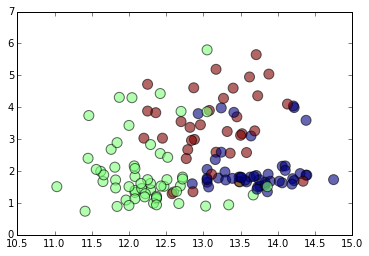

In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_wine, y_class_wine, test_size=.2)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train, s=100, alpha=0.6)

In [21]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# PCA (Principal Components Analysis)

In [22]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=13)
sklearn_transf = sklearn_pca.fit_transform(X_train)
sklearn_pca.explained_variance_ratio_

array([ 0.34522401,  0.19721833,  0.11068048,  0.07332003,  0.07057299,
        0.05099142,  0.04355545,  0.02669371,  0.02305352,  0.0198917 ,
        0.01606496,  0.01366966,  0.00906374])

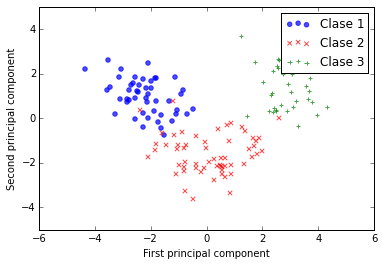

In [23]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=13)
x_sklearn = sklearn_pca.fit_transform(X_train)

for label,marker,color in zip(
        range(1,4),('o', 'x', '+'),('blue', 'red', 'green')):

    plt.scatter(x=x_sklearn[:,0][Y_train == label],
                y=x_sklearn[:,1][Y_train == label],
                marker=marker,
                color=color,
                alpha=0.7,
                label='Clase {} '.format(label)
                )
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend()
plt.show()


In [24]:
sklearn_pca = PCA(n_components= 13)
sklearn_transf = sklearn_pca.fit_transform(X_train)
Y = sklearn_pca.explained_variance_ratio_ #Proportion of variance explained
Z=[] #Cumulative proportion of variance explained
actual=0
for i in Y:
    actual+=i
    Z.append(actual)

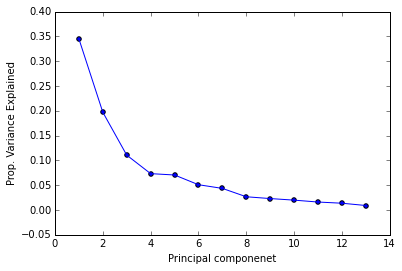

In [25]:
X = np.linspace(1.0, 13.0, num = 13)
plt.plot(X, Y)
plt.scatter(X, Y)
plt.xlabel("Principal componenet")
plt.ylabel("Prop. Variance Explained")

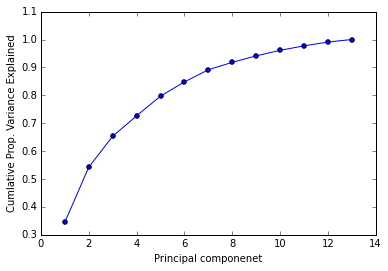

In [26]:
plt.plot(X, Z)
plt.scatter(X, Z)
plt.xlabel("Principal componenet")
plt.ylabel("Cumlative Prop. Variance Explained")

## K-means cluster

In [27]:
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from scipy import spatial

In [28]:
dist = sum(spatial.distance.pdist(X_test)**2)/elements
total=[]

In [29]:
for l in range(1,11):
    cluster = KMeans(l)
    cluster = cluster.fit(X_train)
    #Transforma X_train en un espacio de distancias de cluster
    distances = cluster.transform(X_test)
    add = 0
    for k in range(X_test.shape[0]):
        add+=min(distances[k,:])**2
    total.append(abs(dist-add)/dist*100)
x = range(1,11)

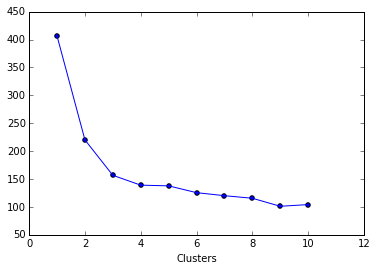

In [30]:
figure = plt.figure(1)
plt.plot(x , total)
plt.scatter(x, total)
plt.xlabel("Clusters")

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier(n_estimators=4)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
#Y_prediction = rf.predict(X_test)
n_trees_total = 10
square_sum = np.zeros(n_trees_total)
for i in range(n_trees_total):
    rf = RandomForestClassifier(n_estimators=i+1)
    rf.fit(X_train[106:], Y_train[106:])
    Y_prediction = rf.predict(X_test)
    square_sum[i] = sum((Y_prediction - Y_train[106:])**2)

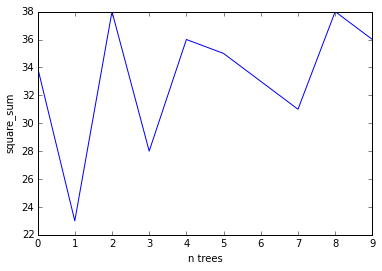

In [34]:
plt.plot(square_sum)
plt.xlabel("n trees")
plt.ylabel("square_sum")